In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
plt.style.use('../../style.mplstyle')

In [3]:
import sys 
sys.path.append("../../devices")

In [4]:
from functiongenerator import AFG2225
from picoammeter import Keithley6487
from powersupply import NGE100
from redpitaya import RedPitaya

In [5]:
red = RedPitaya('172.28.175.57')
nge = NGE100('USB0::0x0AAD::0x0197::5601.1414k03-100771::INSTR')
pico = Keithley6487('ASRL9::INSTR')
func = AFG2225('ASRL19::INSTR')

In [6]:
nge.output(ch=1, state=False)
nge.voltage(ch=1, volt=24)
nge.output(ch=1, state=True)

In [7]:
func.set_frequency(2, 1000)
func.set_amplitude(2, 8)
func.set_offset(2, 4)
func.set_output_onoff(2, 1)

True

In [8]:
size = 1024*2
delay = 8192-size/2.

In [9]:
date = 20220421
path = "C:/Data/{}/".format(date)
if not os.path.exists(path):
    os.makedirs(path)

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5


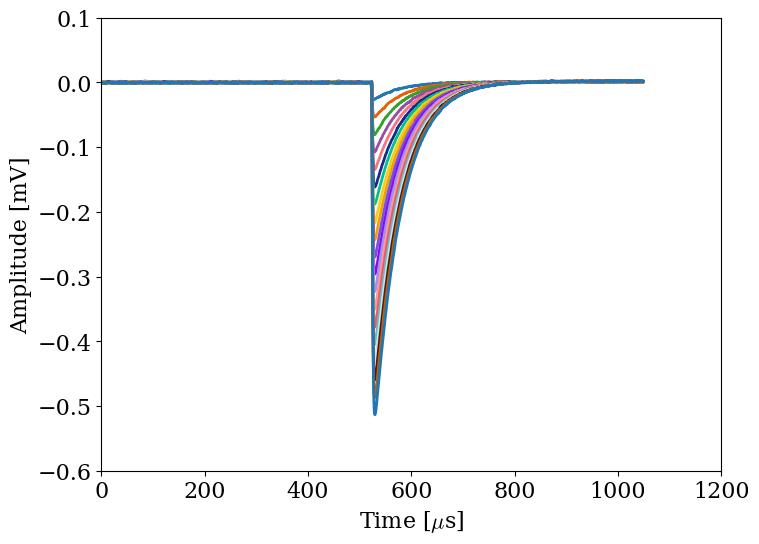

In [16]:
plt.figure()
for x in np.arange(0.5,10,0.5):
    print(x)
    func.set_output_onoff(2, 0)
    func.set_amplitude(2, x)
    func.set_offset(2, x/2.0)
    func.set_frequency(2, 100)
    func.set_output_onoff(2, 1)
    time.sleep(1)
    for y in range(1):
        red.configure(dec_fac=64)
        red.start()
        red.trigger(ch=2, level=-20, delay=delay, edge='N')
        t, data = red.acquire(ch=2, size=size, ascii=True)
        red.save(t, data, ch=2, tag='func_{:.2f}V'.format(x), path=path)
        if y == 0:
            plt.plot(t,data)

plt.xlabel('Time [$\mu$s]')
plt.ylabel('Amplitude [mV]')
plt.show()